In [2]:
import pandas as pd

seeds_df = pd.read_csv("https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

In [3]:
seeds_df.head()

area  perimeter  compactness  length  width  asymmetry_coefficient  \
0  14.88      14.57       0.8811   5.554  3.333                  1.018   
1  14.69      14.49       0.8799   5.563  3.259                  3.586   
2  14.03      14.16       0.8796   5.438  3.201                  1.717   
3  13.99      13.83       0.9183   5.119  3.383                  5.234   
4  14.11      14.26       0.8722   5.520  3.168                  2.688   

   groove_length grain_variety  
0          4.956    Kama wheat  
1          5.219    Kama wheat  
2          5.001    Kama wheat  
3          4.781    Kama wheat  
4          5.219    Kama wheat

In [4]:
seeds_df.grain_variety.value_counts()  # grain_variety是标签，分成了3个类别

Rosa wheat        14
Kama wheat        14
Canadian wheat    14
Name: grain_variety, dtype: int64

In [5]:
varieties = list(seeds_df.pop('grain_variety'))  # 先去掉它，不然就是有监督了

samples = seeds_df.values

In [6]:
samples

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5

In [7]:
# 距离计算
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [8]:
# 层次聚类
mergings = linkage(samples, method='complete')

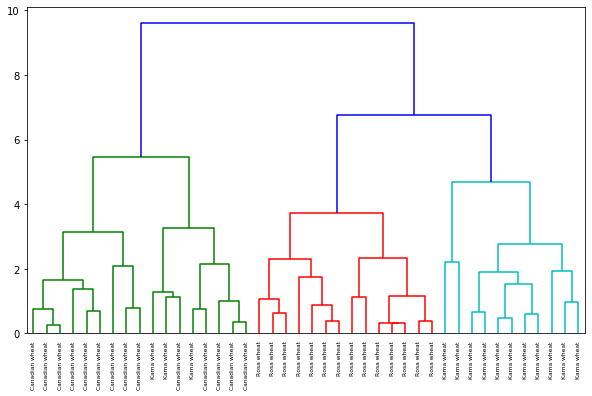

In [9]:
# 树状图结果
fig = plt.figure(figsize=(10,6))
dendrogram(mergings,
           labels=varieties,  # 指定标签，x轴
          leaf_rotation=90,
          leaf_font_size=6,
          )
plt.show()  # 从上往下看

In [10]:
# 得到标签结果
from scipy.cluster.hierarchy import fcluster
#指定结果、高度等，指定在6那里，可以看到上图是分成3类
labels = fcluster(mergings, 6, criterion='distance')  

df = pd.DataFrame({'labels':labels, 'varieties':varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct  # 可以看到只有label 1的结果里面，多分了3个Kama wheat，其它都能分的清

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0

#### 不同距离的选择产生不同的结果


In [43]:
import pandas as pd

# 获取数据，并补0
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2072/datasets/eurovision-2016.csv').fillna(0)

# 打分满分12
scores = pd.crosstab(index=df['From country'], columns=df['To country'], values=df['Televote Points'], aggfunc='first').fillna(12)
samples = scores.values
country_names = list(scores.index)

In [44]:
# 归一化，因为数据可能某些很大，可以看到Points的值小，
# 越大的值，在计算种贡献越多，算法会认为值越大，越重要

from sklearn.preprocessing import normalize
samples = normalize(samples)  # 数据压缩到0-1之间

In [45]:
samples

array([[0.09449112, 0.56694671, 0.        , ..., 0.        , 0.28347335,
        0.        ],
       [0.49319696, 0.        , 0.16439899, ..., 0.        , 0.41099747,
        0.        ],
       [0.        , 0.49319696, 0.12329924, ..., 0.        , 0.32879797,
        0.16439899],
       ...,
       [0.32879797, 0.20549873, 0.24659848, ..., 0.49319696, 0.28769823,
        0.        ],
       [0.28769823, 0.16439899, 0.        , ..., 0.        , 0.49319696,
        0.        ],
       [0.        , 0.24659848, 0.        , ..., 0.        , 0.20549873,
        0.49319696]])

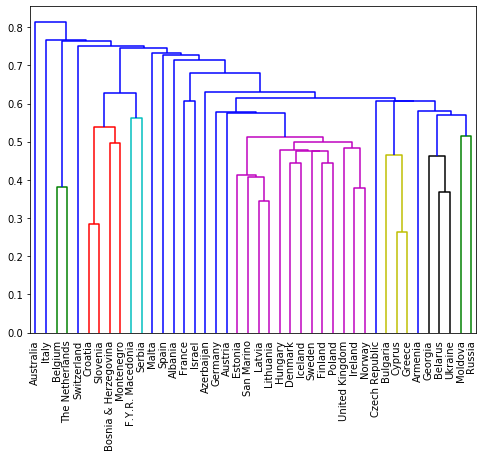

In [46]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')  # 计算最小
fig = plt.figure(figsize=(8, 6))
# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           )
plt.show()

**选择另一种方法**

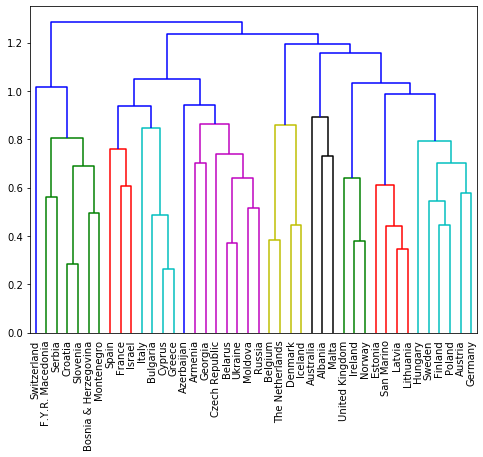

In [47]:
# Modified by Jinny: compare different methods

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')  # 计算最小
fig = plt.figure(figsize=(8, 6))
# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=10,
           )

plt.show()